<a href="https://colab.research.google.com/github/chinnusai25/cvit-Workshop2020/blob/master/Day7(June2)(AfterNoonSession_Perceptron_Mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
import numpy as np

In [43]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [44]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (60000, 784)
Test data shape (10000, 784)


In [0]:
# Function to extract the classes
def extract_2classes(class0, class1, X, Y):
    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]
    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]
    # Join the two classes to make the set
    X_2classes = np.vstack((X_0, X_1))
    Y_2classes = np.append(Y_0, Y_1)
    return X_2classes, Y_2classes

In [0]:
X_train_2classes, Y_train_2classes = extract_2classes(5, 7, x_train, y_train)
X_test_2classes, Y_test_2classes = extract_2classes(5, 7,x_test, y_test)

In [47]:
print("Training data shape: ", X_train_2classes.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", X_test_2classes.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (11686, 784)
Test data shape (1920, 784)


Below is the code for combining Test and Train data into one.

In [48]:
TotalXData = np.append(X_train_2classes,X_test_2classes,axis=0)
TotalYData = np.append(Y_train_2classes,Y_test_2classes)
print(TotalYData.shape)
print(TotalXData.shape)

(13606,)
(13606, 784)


Below is the code for K fold cross Validation

[0.9995590180802587, 0.9977951673739175, 0.9985545580591983, 0.9987321867703465, 0.9983242855552291, 0.9978073649532362, 0.9978160798366429, 0.9975286677886329, 0.9974030996663139]
[0.9772159341466999, 0.9873591123192985, 0.9854475747268717, 0.9881669254912063, 0.9872117182684258, 0.989416741325302, 0.9888283708545147, 0.9873587226885263, 0.9882407507455591]


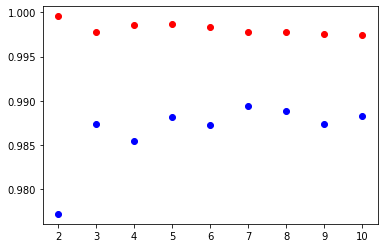

In [50]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

trainAcc=[]
testAcc=[]
kVal=[]
for i in range(2,11):
  kf = KFold(n_splits=i)
  kVal.append(i)
  # kf.get_n_splits(X)
  trainTemp=0
  testTemp=0
  for train_index, test_index in kf.split(TotalXData):
    # print("TRAIN:", train_index[].shape, "TEST:", test_index.shape)
    X_train, X_test = TotalXData[train_index], TotalXData[test_index]
    Y_train, Y_test = TotalYData[train_index], TotalYData[test_index]
    trainTemp+=calc_accuracy(X_train,X_train,Y_train,Y_train)
    # trainTemp+=calc_accuracy(X_test,X_test,Y_test,Y_test)
    testTemp+=calc_accuracy(X_train,X_test,Y_train,Y_test)
    # testTemp+=calc_accuracy(X_train,X_test,Y_train,Y_test)
  trainAcc.append(trainTemp/i)
  testAcc.append(testTemp/i)
print(trainAcc)
print(testAcc)
plt.scatter(x=kVal,y=trainAcc,c="red")
plt.scatter(x=kVal,y=testAcc,c="blue")
plt.show()

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

def predict(train_features,test_features,train_labels): 
    clf = Perceptron(tol=1e-3, random_state=0)
    # Fitting the data into the model
    clf.fit(train_features, train_labels)
    # Predicting the labels for test data
    predicted_values = clf.predict(test_features)
    return predicted_values
    
def calc_accuracy(train_features,test_features,train_labels,test_labels):
    # Calling predict function to get the predicted labels of test data
    pred = predict(train_features,test_features,train_labels)
    return accuracy_score(pred, test_labels)
  

In [52]:
calc_accuracy(X_train_2classes,X_test_2classes,Y_train_2classes,Y_test_2classes)

0.9895833333333334